<a href="https://colab.research.google.com/github/Mrrohit0806/Capstone-project-01/blob/main/Missing_value_filling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('/content/Gurgaon_properties_outlier_treated_02.csv')

In [4]:
df.head()

,property_type,society,sector,price_per_sqft,areaWithType,area,bedRoom,bathroom,balcony,floorNum,facing,agePossession,Price_in_Crore,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,flat,m3m heights,sector 65,15794.0,Super Built up area 1260(117.06 sq.m.),1260.0,2.0,2,2,26.0,NaN,Under Construction,1.99,1260.0,NaN,NaN,0,0,0,0,0,0,48,630.0
1,flat,trisara our homes 3,sohna road,4339.0,Built Up area: 484 (44.97 sq.m.),484.0,1.0,1,0,2.0,NaN,Undefined,0.21,NaN,484.0,NaN,0,0,0,0,0,0,0,484.0
2,flat,sare crescent parc,sector 92,5000.0,Super Built up area 1000(92.9 sq.m.),1000.0,2.0,2,3,2.0,NaN,Moderately Old,0.50,1000.0,NaN,NaN,0,0,0,0,0,0,38,500.0
3,flat,breez global heights,sohna road,6422.0,Super Built up area 623(57.88 sq.m.),654.0,2.0,2,2,2.0,NaN,New Property,0.42,623.0,NaN,NaN,0,0,0,0,0,0,73,327.0
4,flat,godrej air,sector 85,14541.0,Super Built up area 1400(130.06 sq.m.)Carpet a...,894.0,2.0,2,3,30.0,NaN,Under Construction,1.30,NaN,NaN,894.0,0,0,0,0,0,0,111,447.0


In [5]:
df.shape

(3658, 24)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3658 entries, 0 to 3657
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_type        3658 non-null   object 
 1   society              3657 non-null   object 
 2   sector               3658 non-null   object 
 3   price_per_sqft       2863 non-null   float64
 4   areaWithType         3658 non-null   object 
 5   area                 3658 non-null   float64
 6   bedRoom              3658 non-null   float64
 7   bathroom             3658 non-null   int64  
 8   balcony              3658 non-null   object 
 9   floorNum             3640 non-null   float64
 10  facing               2602 non-null   object 
 11  agePossession        3658 non-null   object 
 12  Price_in_Crore       2863 non-null   float64
 13  super_built_up_area  886 non-null    float64
 14  built_up_area        1648 non-null   float64
 15  carpet_area          1891 non-null   f

In [7]:
df.isnull().sum()

,0
property_type,0
society,1
sector,0
price_per_sqft,795
areaWithType,0
area,0
bedRoom,0
bathroom,0
balcony,0
floorNum,18


**Built up area**

<Axes: >

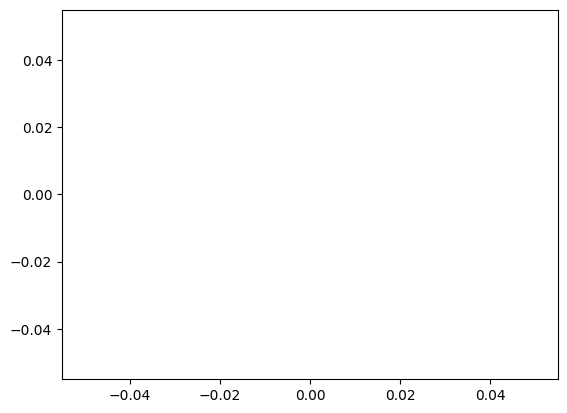

In [10]:
sns.scatterplot(x=df['built_up_area'],y=df['super_built_up_area'])

It seems that there are a lot of missing values in both the **built_up_area** and **super_built_up_area** columns. The scatter plot can only display data points where both values are present. Since many rows have missing values in one or both of these columns, you are not seeing any points on the graph.

In [12]:
((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))

,0
0,False
1,False
2,False
3,False
4,False
...,...
3653,False
3654,False
3655,False
3656,False


In [14]:
all_present_df = df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))]

In [15]:
all_present_df.shape

(0, 24)

There is no row in which all areas are present

In [18]:
s_df = df[~df['super_built_up_area'].isnull()]
b_df = df[~df['built_up_area'].isnull()]
c_df = df[~df['carpet_area'].isnull()]

In [19]:
# both present built up null
sbc_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [20]:
sbc_df.head()

,property_type,society,sector,price_per_sqft,areaWithType,area,bedRoom,bathroom,balcony,floorNum,facing,agePossession,Price_in_Crore,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio


There is no such row in which build area is not present but s_bu_a and carpet area is present

In [21]:
# sb present c is null built up null
sb_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull())]

In [23]:
sb_df.shape

(886, 24)

In [30]:
super_to_built_up_ratio = (s_df['super_built_up_area']/b_df['built_up_area']).mean()

In [25]:
carpet_to_built_up_ratio = (c_df['carpet_area']/b_df['built_up_area']).median()

In [31]:
print(super_to_built_up_ratio, carpet_to_built_up_ratio)

nan 0.8888888888888888


In [27]:
s_df.shape

(886, 24)

In [28]:
b_df.shape

(1648, 24)

In [29]:
c_df.shape

(1891, 24)

In [33]:
c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.88),inplace=True)

/tmp/ipython-input-2296348358.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.88),inplace=True)


In [34]:
df.update(c_df)

In [35]:
df.isnull().sum()

,0
property_type,0
society,1
sector,0
price_per_sqft,795
areaWithType,0
area,0
bedRoom,0
bathroom,0
balcony,0
floorNum,18


In [36]:
s_df

,property_type,society,sector,price_per_sqft,areaWithType,area,bedRoom,bathroom,balcony,floorNum,facing,agePossession,Price_in_Crore,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,flat,m3m heights,sector 65,15794.0,Super Built up area 1260(117.06 sq.m.),1260.0,2.0,2,2,26.0,NaN,Under Construction,1.99,1260.0,NaN,NaN,0,0,0,0,0,0,48,630.000000
2,flat,sare crescent parc,sector 92,5000.0,Super Built up area 1000(92.9 sq.m.),1000.0,2.0,2,3,2.0,NaN,Moderately Old,0.50,1000.0,NaN,NaN,0,0,0,0,0,0,38,500.000000
3,flat,breez global heights,sohna road,6422.0,Super Built up area 623(57.88 sq.m.),654.0,2.0,2,2,2.0,NaN,New Property,0.42,623.0,NaN,NaN,0,0,0,0,0,0,73,327.000000
5,flat,emaar mgf emerald estate,sector 65,12401.0,Super Built up area 1395(129.6 sq.m.),1395.0,3.0,3,3,9.0,North-West,Relatively New,1.73,1395.0,NaN,NaN,0,1,0,0,0,1,159,465.000000
6,flat,mapsko royale ville,sector 82,6425.0,Super Built up area 1790(166.3 sq.m.),1790.0,3.0,4,2,15.0,North-East,Relatively New,1.15,1790.0,NaN,NaN,0,1,0,1,0,2,104,596.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3634,flat,dlf the ultima,sector 81,10926.0,Super Built up area 2100(195.1 sq.m.),2096.0,3.0,4,3+,15.0,West,Relatively New,2.29,2100.0,NaN,NaN,0,1,0,0,0,1,103,698.666667
3648,flat,tulip violet,sector 69,9204.0,Super Built up area 2010(186.74 sq.m.),2010.0,4.0,4,2,14.0,North-East,Relatively New,1.85,2010.0,NaN,NaN,0,0,0,0,0,2,157,502.500000
3651,flat,ats kocoon,sector 109,10597.0,Super Built up area 2095(194.63 sq.m.),2095.0,3.0,3,3,20.0,East,Relatively New,2.22,2095.0,NaN,NaN,0,1,0,0,1,0,79,698.333333
3653,flat,ireo victory valley,sector 67,12847.0,Super Built up area 2452(227.8 sq.m.),2452.0,3.0,4,3+,15.0,South,Relatively New,3.15,2452.0,NaN,NaN,0,1,0,1,0,2,149,817.333333


In [41]:
anamoly_df = df[(df['built_up_area'] < 2000) & (df['Price_in_Crore'] > 2.5)][['Price_in_Crore','area','built_up_area']]

In [46]:
anamoly_df.shape

(84, 3)

In [47]:
anamoly_df['built_up_area'] = anamoly_df['area']

In [48]:
df.update(anamoly_df)

As we discussed, there are no rows in the dataset where both 'built_up_area' and 'super_built_up_area' are present, so we cannot calculate a ratio between them directly from the data.

However, we can still fill the remaining missing values in the 'built_up_area' column with the corresponding values from the 'super_built_up_area' column for the rows where 'built_up_area' is still null after the previous imputation step. This assumes that in cases where 'built_up_area' is missing and 'super_built_up_area' is available, the 'super_built_up_area' can serve as a proxy or a close approximation for the 'built_up_area'.

In [49]:
# Fill remaining missing values in 'built_up_area' with 'super_built_up_area'
df['built_up_area'].fillna(df['super_built_up_area'], inplace=True)

# Check the number of remaining missing values in 'built_up_area'
print(df['built_up_area'].isnull().sum())

0


/tmp/ipython-input-855828905.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['built_up_area'].fillna(df['super_built_up_area'], inplace=True)


In [50]:
df.isnull().sum()

,0
property_type,0
society,1
sector,0
price_per_sqft,795
areaWithType,0
area,0
bedRoom,0
bathroom,0
balcony,0
floorNum,18


In [51]:
df.drop(columns=['area','areaWithType','super_built_up_area','carpet_area','area_room_ratio'],inplace=True)

In [52]:
df.head()

,property_type,society,sector,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,Price_in_Crore,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,m3m heights,sector 65,15794.0,2.0,2,2,26.0,NaN,Under Construction,1.99,1260.0,0,0,0,0,0,0,48
1,flat,trisara our homes 3,sohna road,4339.0,1.0,1,0,2.0,NaN,Undefined,0.21,484.0,0,0,0,0,0,0,0
2,flat,sare crescent parc,sector 92,5000.0,2.0,2,3,2.0,NaN,Moderately Old,0.50,1000.0,0,0,0,0,0,0,38
3,flat,breez global heights,sohna road,6422.0,2.0,2,2,2.0,NaN,New Property,0.42,623.0,0,0,0,0,0,0,73
4,flat,godrej air,sector 85,14541.0,2.0,2,3,30.0,NaN,Under Construction,1.30,1016.0,0,0,0,0,0,0,111



**floorNum**

In [53]:
df[df['floorNum'].isnull()]

,property_type,society,sector,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,Price_in_Crore,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
372,house,independent,sector 4,NaN,2.0,1,3+,NaN,NaN,Moderately Old,NaN,4635.0,0,0,0,0,0,0,0
595,house,emaar mgf marbella,sector 66,NaN,4.0,4,3+,NaN,South-West,Relatively New,NaN,5200.0,0,1,1,1,0,2,114
875,house,independent,sector 3,NaN,3.0,3,0,NaN,NaN,Old Property,NaN,210.0,0,0,0,0,0,0,0
1000,house,independent,sector 24,NaN,3.0,3,1,NaN,NaN,Old Property,NaN,540.0,0,0,0,0,0,0,9
1109,house,vipul tatvam villa,sector 48,NaN,4.0,4,1,NaN,NaN,Relatively New,NaN,3240.0,0,0,0,0,0,0,21
1527,house,vipul tatvam villa,sector 48,NaN,4.0,4,2,NaN,East,Moderately Old,NaN,3240.0,0,1,1,1,0,0,88
1555,house,jacob pura,sector 12,NaN,2.0,1,0,NaN,NaN,Old Property,NaN,360.0,0,0,0,0,0,0,0
1723,house,independent,sector 25,NaN,6.0,8,3+,NaN,NaN,Relatively New,NaN,2844.0,1,1,1,1,0,1,0
1880,house,independent,sector 26,NaN,4.0,4,3+,NaN,NaN,Old Property,NaN,3771.0,0,0,0,0,0,0,28
2353,house,independent,sector 4,NaN,4.0,2,2,NaN,NaN,Moderately Old,NaN,585.0,0,0,0,0,0,0,0


In [54]:
df[df['property_type'] == 'house']['floorNum'].median()

2.0

In [55]:
df['floorNum'].fillna(2.0,inplace=True)

/tmp/ipython-input-15612474.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['floorNum'].fillna(2.0,inplace=True)


In [56]:
df.isnull().sum()

,0
property_type,0
society,1
sector,0
price_per_sqft,795
bedRoom,0
bathroom,0
balcony,0
floorNum,0
facing,1056
agePossession,0


We jusg drop facing coloumn

In [57]:
df.drop(columns=['facing'],inplace=True)

In [59]:
df.isnull().sum()

,0
property_type,0
society,1
sector,0
price_per_sqft,795
bedRoom,0
bathroom,0
balcony,0
floorNum,0
agePossession,0
Price_in_Crore,795


In [64]:
df[df['society'].isnull()]

,property_type,society,sector,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,Price_in_Crore,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2409,flat,NaN,sector 78,3692.0,2.0,2,0,2.0,Under Construction,0.6,1625.0,0,0,0,0,0,0,0


In [65]:
df.drop(index=[2409],inplace=True)



**agePossession**

In [66]:
df['agePossession'].value_counts()

,count
agePossession,
Relatively New,1632
New Property,574
Moderately Old,567
Old Property,317
Undefined,300
Under Construction,267


there is 300 values as undefind

In [67]:
df[df['agePossession'] == 'Undefined']

,property_type,society,sector,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,Price_in_Crore,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1,flat,trisara our homes 3,sohna road,4339.0,1.0,1,0,2.0,Undefined,0.210,484.0,0,0,0,0,0,0,0
26,flat,shapoorji pallonji joyville gurugram,sector 102,10383.0,2.0,2,2,14.0,Undefined,0.950,915.0,0,0,0,0,0,0,0
39,house,independent,sector 3 phase 3 extension,NaN,1.0,1,0,1.0,Undefined,NaN,1000.0,0,0,0,0,0,0,0
53,flat,assotech blith,sector 99,6667.0,3.0,4,0,15.0,Undefined,1.600,2400.0,0,0,0,0,0,0,51
54,flat,chintamani,sector 103,8509.0,3.0,3,3,1.0,Undefined,1.570,1845.0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3580,house,independent,sector 12,NaN,3.0,3,0,1.0,Undefined,NaN,200.0,0,0,0,0,0,0,0
3583,flat,shapoorji pallonji joyville gurugram,sector 102,10380.0,2.0,2,3,14.0,Undefined,1.420,1368.0,0,0,0,0,0,0,0
3618,house,independent,sector 11,NaN,5.0,4,1,2.0,Undefined,NaN,225.0,0,0,0,0,0,0,0
3619,flat,global hill view,sector 11,4271.0,2.0,2,0,11.0,Undefined,0.325,761.0,0,0,0,0,0,0,0


In [69]:
def mode_based_imputation(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector']) & (df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0]
        else:
            return np.nan
    else:
        return row['agePossession']

In [70]:
df['agePossession'] = df.apply(mode_based_imputation,axis=1)

In [71]:
df['agePossession'].value_counts()


,count
agePossession,
Relatively New,1757
New Property,604
Moderately Old,601
Old Property,350
Under Construction,281
Undefined,64


In [72]:
def mode_based_imputation2(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0]
        else:
            return np.nan
    else:
        return row['agePossession']

In [73]:
df['agePossession'] = df.apply(mode_based_imputation2,axis=1)

In [74]:
df['agePossession'].value_counts()

,count
agePossession,
Relatively New,1771
Moderately Old,608
New Property,606
Old Property,359
Under Construction,281
Undefined,32


In [75]:
def mode_based_imputation3(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0]
        else:
            return np.nan
    else:
        return row['agePossession']

In [76]:
df['agePossession'] = df.apply(mode_based_imputation3,axis=1)

In [77]:
df['agePossession'].value_counts()

,count
agePossession,
Relatively New,1779
Moderately Old,632
New Property,606
Old Property,359
Under Construction,281


In [78]:
df.isnull().sum()

,0
property_type,0
society,0
sector,0
price_per_sqft,795
bedRoom,0
bathroom,0
balcony,0
floorNum,0
agePossession,0
Price_in_Crore,795


**Price**

In [84]:
# Filter rows where 'Price_in_Crore' is missing
missing_price_df = df[df['Price_in_Crore'].isnull()]

# Display the number of rows with missing 'Price_in_Crore'
print(f"Number of rows with missing 'Price_in_Crore': {missing_price_df.shape[0]}")

# Display the head of the DataFrame with missing 'Price_in_Crore'
display(missing_price_df.head())

Number of rows with missing 'Price_in_Crore': 795


,property_type,society,sector,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,Price_in_Crore,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_score_bin
15,house,independent,sector 12,NaN,2.0,5,1,3.0,Old Property,NaN,2052.0,0,0,0,0,0,0,31,"[0, 50)"
19,house,independent,sector 23,NaN,3.0,3,2,2.0,Moderately Old,NaN,2000.0,0,0,1,1,0,0,28,"[0, 50)"
20,house,international city by sobha phase 2,sector 109,NaN,4.0,5,3+,3.0,New Property,NaN,2430.0,1,1,1,1,0,0,138,"[100, 150)"
23,house,independent,sector 31,NaN,4.0,4,3,2.0,Old Property,NaN,1449.0,0,0,1,0,0,2,70,"[50, 100)"
31,house,independent,sector 25,NaN,2.0,4,3,3.0,Old Property,NaN,1350.0,0,0,0,0,0,0,40,"[0, 50)"


In [90]:
# Group by sector and property_type and calculate the mean price and luxury score
grouped_data = df.groupby(['sector', 'property_type'])[['Price_in_Crore', 'luxury_score']].mean().reset_index()

# Display the grouped data
display(grouped_data.head())

,sector,property_type,Price_in_Crore,luxury_score
0,", delhi ncr",house,NaN,0.0
1,acharya puri,house,NaN,4.0
2,adarsh nagar,flat,1.12,25.0
3,alipur,house,NaN,0.0
4,ambience island,flat,4.50,0.0


In [89]:
# Define luxury score bins
luxury_score_bins = [0, 50, 100, 150, 200, 250, 300]

# Create a new column for luxury score bins
df['luxury_score_bin'] = pd.cut(df['luxury_score'], bins=luxury_score_bins, right=False)

# Group by sector, property_type, and luxury_score_bin and calculate the mean Price_in_Crore
grouped_data_luxury = df.groupby(['sector', 'property_type', 'luxury_score_bin'])['Price_in_Crore'].mean().reset_index()

# Display the grouped data
display(grouped_data_luxury.head())

/tmp/ipython-input-3968093613.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data_luxury = df.groupby(['sector', 'property_type', 'luxury_score_bin'])['Price_in_Crore'].mean().reset_index()


,sector,property_type,luxury_score_bin,Price_in_Crore
0,", delhi ncr",flat,"[0, 50)",NaN
1,", delhi ncr",flat,"[50, 100)",NaN
2,", delhi ncr",flat,"[100, 150)",NaN
3,", delhi ncr",flat,"[150, 200)",NaN
4,", delhi ncr",flat,"[200, 250)",NaN


In [91]:
df.head()

,property_type,society,sector,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,Price_in_Crore,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_score_bin
0,flat,m3m heights,sector 65,15794.0,2.0,2,2,26.0,Under Construction,1.99,1260.0,0,0,0,0,0,0,48,"[0, 50)"
1,flat,trisara our homes 3,sohna road,4339.0,1.0,1,0,2.0,Relatively New,0.21,484.0,0,0,0,0,0,0,0,"[0, 50)"
2,flat,sare crescent parc,sector 92,5000.0,2.0,2,3,2.0,Moderately Old,0.50,1000.0,0,0,0,0,0,0,38,"[0, 50)"
3,flat,breez global heights,sohna road,6422.0,2.0,2,2,2.0,New Property,0.42,623.0,0,0,0,0,0,0,73,"[50, 100)"
4,flat,godrej air,sector 85,14541.0,2.0,2,3,30.0,Under Construction,1.30,1016.0,0,0,0,0,0,0,111,"[100, 150)"


In [92]:
df.isnull().sum()

,0
property_type,0
society,0
sector,0
price_per_sqft,795
bedRoom,0
bathroom,0
balcony,0
floorNum,0
agePossession,0
Price_in_Crore,795


In [95]:
# Group by sector and calculate the mean Price_in_Crore
grouped_data_sector = df.groupby('sector')['Price_in_Crore'].mean().reset_index()

# Display the grouped data
display(grouped_data_sector.head())

,sector,Price_in_Crore
0,", delhi ncr",NaN
1,acharya puri,NaN
2,adarsh nagar,1.12
3,alipur,NaN
4,ambience island,4.50


In [96]:
# Implement imputation for missing 'Price_in_Crore' values using sector-based average
# We will only fill values where 'Price_in_Crore' is currently null

def impute_price_sector(row):
    if pd.isnull(row['Price_in_Crore']):
        sector = row['sector']

        # Find the average price for the sector using grouped_data_sector
        mean_price = grouped_data_sector[
            (grouped_data_sector['sector'] == sector)
        ]['Price_in_Crore'].iloc[0] if not grouped_data_sector[
            (grouped_data_sector['sector'] == sector)
        ].empty else np.nan # Return NaN if no data for the sector

        return mean_price
    else:
        return row['Price_in_Crore'] # Return the existing price if not null

# Apply the imputation function to fill missing 'Price_in_Crore' values
df['Price_in_Crore'] = df.apply(impute_price_sector, axis=1)

# Verify imputation by checking the number of remaining missing values in 'Price_in_Crore'
print(f"Number of remaining missing values in 'Price_in_Crore': {df['Price_in_Crore'].isnull().sum()}")

Number of remaining missing values in 'Price_in_Crore': 171


In [97]:
# Group by property_type and calculate the median Price_in_Crore
median_price_by_property_type = df.groupby('property_type')['Price_in_Crore'].median().reset_index()

# Display the median prices by property type
display(median_price_by_property_type)

# Implement imputation for remaining missing 'Price_in_Crore' values using property type median
# We will only fill values where 'Price_in_Crore' is currently null

def impute_price_property_type(row):
    if pd.isnull(row['Price_in_Crore']):
        property_type = row['property_type']

        # Find the median price for the property type
        median_price = median_price_by_property_type[
            (median_price_by_property_type['property_type'] == property_type)
        ]['Price_in_Crore'].iloc[0] if not median_price_by_property_type[
            (median_price_by_property_type['property_type'] == property_type)
        ].empty else np.nan # Return NaN if no data for the property type

        return median_price
    else:
        return row['Price_in_Crore'] # Return the existing price if not null

# Apply the imputation function to fill remaining missing 'Price_in_Crore' values
df['Price_in_Crore'] = df.apply(impute_price_property_type, axis=1)

# Verify imputation by checking the number of remaining missing values in 'Price_in_Crore'
print(f"Number of remaining missing values in 'Price_in_Crore': {df['Price_in_Crore'].isnull().sum()}")

,property_type,Price_in_Crore
0,flat,1.3800
1,house,1.7596


Number of remaining missing values in 'Price_in_Crore': 0


In [98]:
df.isnull().sum()

,0
property_type,0
society,0
sector,0
price_per_sqft,795
bedRoom,0
bathroom,0
balcony,0
floorNum,0
agePossession,0
Price_in_Crore,0


**prize_pr_sqft**

In [99]:
# Convert 'Price_in_Crore' to a simple form (e.g., Rupees)
df['Price_in_Rupees'] = df['Price_in_Crore'] * 10000000

# Calculate 'price_per_sqft' using 'Price_in_Rupees' and 'built_up_area'
# We will only fill missing values in 'price_per_sqft'
df['price_per_sqft'].fillna(df['Price_in_Rupees'] / df['built_up_area'], inplace=True)

# Drop the temporary 'Price_in_Rupees' column
df.drop(columns=['Price_in_Rupees'], inplace=True)

# Verify imputation by checking the number of remaining missing values in 'price_per_sqft'
print(f"Number of remaining missing values in 'price_per_sqft': {df['price_per_sqft'].isnull().sum()}")

Number of remaining missing values in 'price_per_sqft': 0


/tmp/ipython-input-2313274319.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['price_per_sqft'].fillna(df['Price_in_Rupees'] / df['built_up_area'], inplace=True)


In [100]:
df.isnull().sum()

,0
property_type,0
society,0
sector,0
price_per_sqft,0
bedRoom,0
bathroom,0
balcony,0
floorNum,0
agePossession,0
Price_in_Crore,0


In [101]:
df.to_csv('gurgaon_properties_missing_value_imputation.csv',index=False)